In [9]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets.cifar10 import load_data

from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

from tensorflow.keras.applications.vgg16 import VGG16
print(tf.__version__)

import matplotlib.pyplot as plt
import os
import random

2.1.0


设置一下cifar10中的类别名称，

In [2]:
classes_cifar10 = ['airplane','automobile','bird','cat','deer','dog',
                  'frog','horse','ship','truck']

引入训练集与测试集

In [3]:
(X_train, y_train), (X_test,y_test) = load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

定义方法并查看前几个图片

In [12]:
def show_images(num):
    for i in range(num):
        idx = random.randint(0,len(X_train))
        plt.imshow(X_train[idx])
        plt.title(classes_cifar10[int(y_train[idx])])
        plt.show()

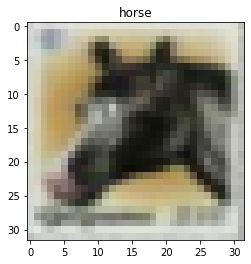

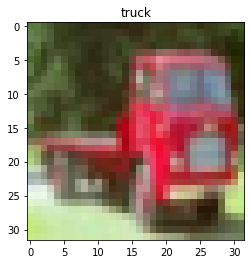

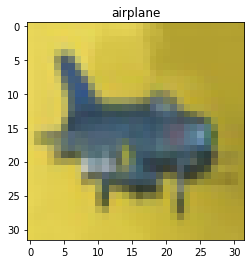

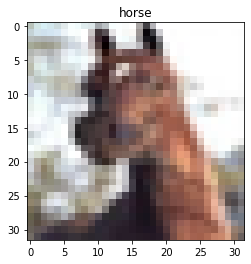

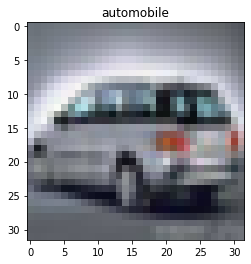

In [14]:
show_images(5)

In [29]:
pre_trained_model = VGG16(input_shape=(32,32,3)
                          ,include_top=False
                          ,weights='imagenet')

In [16]:
# for layer in pre_trained_model.layers:
#     layer.trainable = False

In [17]:
for layer in pre_trained_model.layers:
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [30]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)

last layer output shape: (None, 1, 1, 512)


In [31]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [32]:
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(10, activation='softmax')(x)

In [33]:
model = keras.Model(pre_trained_model.input, output)

In [34]:
model.compile(optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [36]:

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [37]:
history = model.fit(X_train,y_train, epochs=500, 
                    validation_data=(X_test, y_test),
                   callbacks=[early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 50s 998us/sample - loss: 2.0581 - accuracy: 0.2068 - val_loss: 1.7518 - val_accuracy: 0.3094
Epoch 2/500
50000/50000 [==============================] - 48s 954us/sample - loss: 1.7447 - accuracy: 0.2996 - val_loss: 1.5525 - val_accuracy: 0.3858: 1.7 - ETA: 1s - loss: 1.7475 - accura - ETA: 0s - los
Epoch 3/500
50000/50000 [==============================] - 48s 956us/sample - loss: 1.6268 - accuracy: 0.3439 - val_loss: 1.7940 - val_accuracy: 0.3037loss: 1.6591 - ETA: 30s - loss: 1.6599 - acc - ETA: 18s - loss: 1 - ETA: 14s - loss: 1.6426 - accuracy: 0.339 - ETA: 14s - loss: 1.6429 - ETA: 12s - loss: 1.6414  - ETA: 11s - loss: 1.6391 - accuracy - ETA: 6s - loss: 1.6332 - accuracy:  - ETA: 6s - los - ETA: 1s - loss: 1.6264 - accuracy: 0. - ETA: 1s - loss: 1.6267 - accuracy:  - ETA: 0s -
Epoch 4/500
50000/50000 [==============================] - 48s 962us/sample - loss: 1.5338 - acc

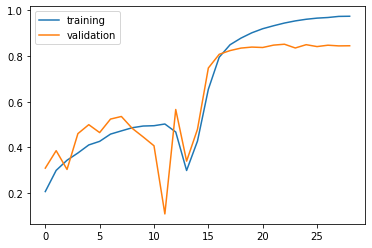

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

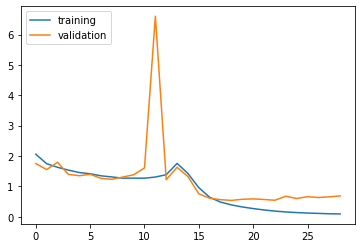

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()